In [90]:
import numpy as np
import pandas as pd


data = {
    'products': [
        'bread eggs',
        'bread eggs milk',
        'milk cheese',
        'bread butter cheese',
        'eggs milk',
        'bread milk butter cheese',
    ]
}

transactions = pd.DataFrame(data=data, index=range(1, 7))
expanded= transactions['products'].str.split(expand=True)
products = []   
for i in expanded.columns:
    products.append(expanded[i].unique())
products = np.concatenate(products)
products=set(products)
products = list(products)
products.remove(None)   
products.sort()
transactions_encoded_df=pd.DataFrame(columns=products)
for i in products:
    for j in range(len(expanded)):
        if i in expanded.iloc[j].values:
            transactions_encoded_df.loc[j,i]=1
        else:
            transactions_encoded_df.loc[j,i]=0
print(transactions_encoded_df)

  bread butter cheese eggs milk
0     1      0      0    1    0
1     1      0      0    1    1
2     0      0      1    0    1
3     1      1      1    0    0
4     0      0      0    1    1
5     1      1      1    0    1


In [98]:
import numpy as np
import pandas as pd


data = {
    'products': [
        'bread eggs',
        'bread eggs milk',
        'milk cheese',
        'bread butter cheese',
        'eggs milk',
        'bread milk butter cheese',
    ]
}

transactions = pd.DataFrame(data=data, index=range(1, 7))
expanded = transactions['products'].str.split(expand=True)

products = []
for col in expanded.columns:
    for product in expanded[col].unique():
        if product is not None and product not in products:
            products.append(product)
products.sort()

transactions_encoded = np.zeros(
    (len(transactions), len(products)), dtype='int8'
)

for row in zip(
    range(len(transactions)), transactions_encoded, expanded.values
):
    for idx, product in enumerate(products):
        if product in row[2]:
            transactions_encoded[row[0], idx] = 1
transactions_encoded_df = pd.DataFrame(
    transactions_encoded, columns=products
)
support= transactions_encoded_df.sum()/len(transactions_encoded_df)
print((support))

bread     0.666667
butter    0.333333
cheese    0.500000
eggs      0.500000
milk      0.666667
dtype: float64


In [109]:
import numpy as np
import pandas as pd


data = {
    'products': [
        'bread eggs',
        'bread eggs milk',
        'milk cheese',
        'bread butter cheese',
        'eggs milk',
        'bread milk butter cheese',
    ]
}

transactions = pd.DataFrame(data=data, index=range(1, 7))
expanded = transactions['products'].str.split(expand=True)

products = []
for col in expanded.columns:
    for product in expanded[col].unique():
        if product is not None and product not in products:
            products.append(product)
products.sort()

transactions_encoded = np.zeros(
    (len(transactions), len(products)), dtype='int8'
)

for row in zip(
    range(len(transactions)), transactions_encoded, expanded.values
):
    for idx, product in enumerate(products):
        if product in row[2]:
            transactions_encoded[row[0], idx] = 1
transactions_encoded_df = pd.DataFrame(
    transactions_encoded, columns=products
)
transactions_encoded_df
bread=0
milk=0
for i in range(len(transactions_encoded_df)):
    if transactions_encoded_df.iloc[i]['butter']==1:     
        if transactions_encoded_df.iloc[i]['bread']==1:
           bread+=1
        if transactions_encoded_df.iloc[i]['milk']==1:
            milk+=1

print('support(butter, bread)=',round(bread/len(transactions_encoded_df),4))
print('support(butter, milk)=',round(milk/len(transactions_encoded_df),4))

support(butter, bread)= 0.3333
support(butter, milk)= 0.1667


In [116]:
import numpy as np
import pandas as pd


data = {
    'products': [
        'bread eggs',
        'bread eggs milk',
        'milk cheese',
        'bread butter cheese',
        'eggs milk',
        'bread milk butter cheese',
    ]
}

transactions = pd.DataFrame(data=data, index=range(1, 7))
expanded = transactions['products'].str.split(expand=True)

products = []
for col in expanded.columns:
    for product in expanded[col].unique():
        if product is not None and product not in products:
            products.append(product)
products.sort()

transactions_encoded = np.zeros(
    (len(transactions), len(products)), dtype='int8'
)

for row in zip(
    range(len(transactions)), transactions_encoded, expanded.values
):
    for idx, product in enumerate(products):
        if product in row[2]:
            transactions_encoded[row[0], idx] = 1
transactions_encoded_df = pd.DataFrame(
    transactions_encoded, columns=products
)
bread_cheese=0
cheese_butter=0
for i in range(len(transactions_encoded_df)):
    if transactions_encoded_df.iloc[i]['cheese']==1:     
        if transactions_encoded_df.iloc[i]['bread']==1:
           bread_cheese+=1
        if transactions_encoded_df.iloc[i]['butter']==1:
            cheese_butter+=1
support= transactions_encoded_df.sum()/len(transactions_encoded_df)
print('conf(cheese, bread) =',round(bread_cheese/transactions_encoded_df['cheese'].sum(),4))
print(f'conf(butter, cheese) ={round(cheese_butter/transactions_encoded_df["butter"].sum()):.4f}')


conf(cheese, bread) = 0.6667
conf(butter, cheese) =1.0000


In [5]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor


np.random.seed(42)

data=pd.read_csv('blobs.csv')

lof=LocalOutlierFactor(n_neighbors=20)
data['lof']=(lof.fit_predict(data))
print(data.lof.value_counts())

lof
 1    281
-1     19
Name: count, dtype: int64


In [11]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest


np.random.seed(42)

data=pd.read_csv('factory.csv')

forest=IsolationForest(n_estimators=100, random_state=42,contamination=0.05)
data['outlier_flag']=forest.fit_predict(data)
print(data.outlier_flag.value_counts())   


outlier_flag
 1    380
-1     20
Name: count, dtype: int64


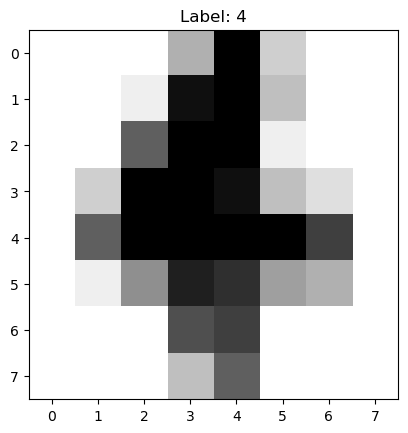

4


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


np.random.seed(42)
data, target = load_digits(return_X_y=True)

idx = 250
plt.imshow(data[idx].reshape(8, 8), cmap='gray_r')
plt.title(f'Label: {target[idx]}')
plt.show()

print(target[idx])

In [15]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split


np.random.seed(42)
data, target = load_digits(return_X_y=True)
data=data/data.max()
X_train, X_test, y_train, y_test = train_test_split(
    data, target, random_state=42
)
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_train shape: (1347, 64)
y_train shape: (1347,)
X_test shape: (450, 64)
y_test shape: (450,)


In [17]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


np.random.seed(42)
data, target = load_digits(return_X_y=True)
data = data / data.max()

X_train, X_test, y_train, y_test = train_test_split(
    data, target, random_state=42
)
classifier=KNeighborsClassifier()
classifier.fit(X_train,y_train)
print('KNN accuracy:',round(classifier.score(X_test,y_test),4))

KNN accuracy: 0.9933


In [18]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


np.random.seed(42)
data, target = load_digits(return_X_y=True)
data = data / data.max()

X_train, X_test, y_train, y_test = train_test_split(
    data, target, random_state=42
)
classifier=LogisticRegression(max_iter=100)
classifier.fit(X_train,y_train)
print('Logistic regression accuracy:',round(classifier.score(X_test,y_test),4))

Logistic regression accuracy: 0.9689


c:\Users\tkdar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1]:
import numpy as np
import pandas as pd

data_train=pd.read_csv('data_train.csv')
target_train=pd.read_csv('target_train.csv')
print(data_train[2])

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xfe in position 71579: invalid start byte

In [97]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


data_train = pd.read_csv('data_train.csv')
target_train = pd.read_csv('target_train.csv')

categories = ['comp.graphics', 'sci.space']

data_train = data_train['text'].tolist()
target_train = target_train.values.ravel()

vectorizer = CountVectorizer()
data_train_vectorized = vectorizer.fit_transform(data_train)

model=MultinomialNB()
data_transformed=model.fit_transform(data_train_vectorized,target_train)
print(data_transformed)



FileNotFoundError: [Errno 2] No such file or directory: 'data_train.csv'